# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

* Cities located about 40 and -40 degs Latitude, do not see temps about 80 F this time of year when this data was collectd.

* At the time of this data collected, most cities have windspeeds at or below 20mph for all latitudes

* Cloudiness and humidity, at the time of this data collected, are not affected by latitude.  Seems to be no trends observed.

---


In [2]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv
import json
from pandas.io.json import json_normalize

# Import API key
#import api_keys
#from api_keys import api_key

# Open weather API key
api_key = 'Add Your OW API Key Here' 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputDataFile = "Cities_Output/rawCities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

#### Check for and Get Rid of Duplicates!!!

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
numCities = len(cities)
#List slicing:
smallListCities = cities
smallLIST = smallListCities[:2]
numCities


610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Open Weather Maps Api example links for reference
#By city ID : api.openweathermap.org/data/2.5/weather?id=2172797
#By geographic coordinates : api.openweathermap.org/data/2.5/weather?lat=35&lon=139
#By city name : api.openweathermap.org/data/2.5/weather?q=London OR api.openweathermap.org/data/2.5/weather?q=London,uk 
#By ZIP code : api.openweathermap.org/data/2.5/weather?zip=94040,us
#JSON {"coord":{"lon":145.77,"lat":-16.92},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],
# "base":"cmc stations","main":{"temp":293.25,"pressure":1019,"humidity":83,"temp_min":289.82,"temp_max":295.37},
# "wind":{"speed":5.1,"deg":150},"clouds":{"all":75},"rain":{"3h":3},"dt":1435658272,
# "sys":{"type":1,"id":8166,"message":0.0166,"country":"AU","sunrise":1435610796,"sunset":1435650870},"id":2172797,
# "name":"Cairns","cod":200}
#
#don't forget to add this to above:  '%s&APPID=%s&units=imperial'

weatherDATA = []
dataError = []

print(f"\nBeginning Data Retrieval\n\n" + "-"*25)

setCounter = 1
lineCount = 1

#for count, city in enumerate(smallLIST,1):
for count, city in enumerate(cities,1):

    if count % 50 == 0:
        setCounter += 1
        lineCount = 1
        
    url = 'https://api.openweathermap.org/data/2.5/weather?q=%s&APPID=%s&units=imperial' % (city,api_key)
    weatherResponse = requests.get(url).json()
    
    try:
    
        print(f"Processing record {lineCount} of Set {setCounter} | {city}")
        weatherResponse = requests.get(url).json()
        weatherDATA.append(weatherResponse)
        
    except:
        print(f"City: ({city}) - not found. Skipping...")
        dataError.append(city)

    lineCount += 1
    

print(f"\n" + "-"*25 + "\n\nTh-Th-The, Th-Th-The, Th-Th...That's all,FOLKS!\n")
print(f"Data Retrieval Complete\n\n" + "-"*25)




Beginning Data Retrieval

-------------------------
Processing record 1 of Set 1 | bengkulu
Processing record 2 of Set 1 | tuatapere
Processing record 3 of Set 1 | ushuaia
Processing record 4 of Set 1 | yerbogachen
Processing record 5 of Set 1 | satitoa
Processing record 6 of Set 1 | punta arenas
Processing record 7 of Set 1 | karaul
Processing record 8 of Set 1 | arraial do cabo
Processing record 9 of Set 1 | kakonko
Processing record 10 of Set 1 | yeppoon
Processing record 11 of Set 1 | san patricio
Processing record 12 of Set 1 | dalvik
Processing record 13 of Set 1 | mehamn
Processing record 14 of Set 1 | odweyne
Processing record 15 of Set 1 | korla
Processing record 16 of Set 1 | lima
Processing record 17 of Set 1 | fairbanks
Processing record 18 of Set 1 | tumannyy
Processing record 19 of Set 1 | busselton
Processing record 20 of Set 1 | new norfolk
Processing record 21 of Set 1 | tuktoyaktuk
Processing record 22 of Set 1 | lasa
Processing record 23 of Set 1 | narsaq
Processing

Processing record 50 of Set 4 | kalakamati
Processing record 1 of Set 5 | edgewater
Processing record 2 of Set 5 | kloulklubed
Processing record 3 of Set 5 | vao
Processing record 4 of Set 5 | coihaique
Processing record 5 of Set 5 | batagay-alyta
Processing record 6 of Set 5 | saint george
Processing record 7 of Set 5 | umzimvubu
Processing record 8 of Set 5 | margate
Processing record 9 of Set 5 | ribeira grande
Processing record 10 of Set 5 | olafsvik
Processing record 11 of Set 5 | georgetown
Processing record 12 of Set 5 | denham springs
Processing record 13 of Set 5 | nata
Processing record 14 of Set 5 | bereda
Processing record 15 of Set 5 | biak
Processing record 16 of Set 5 | attawapiskat
Processing record 17 of Set 5 | rovaniemi
Processing record 18 of Set 5 | alice springs
Processing record 19 of Set 5 | sao tome
Processing record 20 of Set 5 | voh
Processing record 21 of Set 5 | urengoy
Processing record 22 of Set 5 | harrow
Processing record 23 of Set 5 | umea
Processing r

Processing record 50 of Set 8 | benjamin hill
Processing record 1 of Set 9 | thinadhoo
Processing record 2 of Set 9 | mount gambier
Processing record 3 of Set 9 | rawson
Processing record 4 of Set 9 | hofn
Processing record 5 of Set 9 | usakos
Processing record 6 of Set 9 | dunedin
Processing record 7 of Set 9 | komsomolskiy
Processing record 8 of Set 9 | chapleau
Processing record 9 of Set 9 | vila franca do campo
Processing record 10 of Set 9 | cape canaveral
Processing record 11 of Set 9 | sioux falls
Processing record 12 of Set 9 | vanavara
Processing record 13 of Set 9 | victor harbor
Processing record 14 of Set 9 | ahipara
Processing record 15 of Set 9 | mandalgovi
Processing record 16 of Set 9 | kuche
Processing record 17 of Set 9 | tingo maria
Processing record 18 of Set 9 | nome
Processing record 19 of Set 9 | high rock
Processing record 20 of Set 9 | campoverde
Processing record 21 of Set 9 | bathsheba
Processing record 22 of Set 9 | college
Processing record 23 of Set 9 | ni

Processing record 47 of Set 12 | robertsport
Processing record 48 of Set 12 | teneguiban
Processing record 49 of Set 12 | touros
Processing record 50 of Set 12 | palmer
Processing record 1 of Set 13 | ixtapa
Processing record 2 of Set 13 | tessalit
Processing record 3 of Set 13 | caravelas
Processing record 4 of Set 13 | cairns
Processing record 5 of Set 13 | anastacio
Processing record 6 of Set 13 | ugoofaaru
Processing record 7 of Set 13 | kyra
Processing record 8 of Set 13 | bargal
Processing record 9 of Set 13 | plainview
Processing record 10 of Set 13 | coahuayana
Processing record 11 of Set 13 | pangnirtung

-------------------------

Th-Th-The, Th-Th-The, Th-Th...That's all,FOLKS!

Data Retrieval Complete

-------------------------


In [19]:
#Put Data in to a Data Frame...
#df = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
weatherOneDataDF = pd.DataFrame.from_dict(json_normalize(weatherDATA), orient='columns')

weatherOneDataDF.count()


base               546
clouds.all         546
cod                610
coord.lat          546
coord.lon          546
dt                 546
id                 546
main.grnd_level    297
main.humidity      546
main.pressure      546
main.sea_level     297
main.temp          546
main.temp_max      546
main.temp_min      546
message             64
name               546
rain.1h              5
rain.3h             52
sys.country        546
sys.id             249
sys.message        546
sys.sunrise        546
sys.sunset         546
sys.type           249
visibility         238
weather            546
wind.deg           533
wind.gust           17
wind.speed         546
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
#Export to csv
weatherOneDataDF.to_csv('Cities_Output/rawCities.csv')

In [32]:
# Copy old DataFrame to New DF and perform rename and clean up...
weatherDataDF = weatherOneDataDF[['name','clouds.all','sys.country','dt','main.humidity','coord.lat','coord.lon',
                              'main.temp_max','wind.speed']].copy()
weatherDataDF.head()
#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
weatherDataDF.rename(columns={
                              'name': 'City','clouds.all':'Cloudiness','sys.country':'Country','dt':'Date',
                              'main.humidity':'Humidity','coord.lat':'Lat','coord.lon':'Lng','main.temp_max': 'Max Temp',
                              'wind.speed':'Wind Speed'
                              }, inplace=True)

# compute time and change date to the format for plots
#df['date'] = pd.to_datetime(df['date'],unit='s',format='%Y/%m/%d')  format='%m/%d/%Y %H:%M:%S'
weatherDataDF['Date'] = pd.to_datetime(weatherDataDF['Date'], unit='s')
weatherDataDF['Date'] = weatherDataDF['Date'].dt.strftime('%m/%d/%Y')
weatherDataDF.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,Tuatapere,76.0,NZ,10/31/2018,100.0,-46.13,167.69,47.09,18.19
2,Ushuaia,0.0,AR,10/31/2018,63.0,-54.81,-68.31,46.55,13.71
3,Yerbogachen,64.0,RU,10/31/2018,73.0,61.28,108.01,29.95,10.36
4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [33]:
#clean up all NaN and NaT values
weatherDataDF = weatherDataDF.dropna()

weatherDataDF.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [34]:
#Export a cleaner weather data to csv
weatherDataDF.to_csv('Cities_Output/CleanWeather_cities.csv')
weatherDataDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Tuatapere,76.0,NZ,10/31/2018,100.0,-46.13,167.69,47.09,18.19
2,Ushuaia,0.0,AR,10/31/2018,63.0,-54.81,-68.31,46.55,13.71
3,Yerbogachen,64.0,RU,10/31/2018,73.0,61.28,108.01,29.95,10.36
5,Punta Arenas,0.0,CL,10/31/2018,34.0,-53.16,-70.91,53.60,24.16
7,Arraial do Cabo,0.0,BR,10/31/2018,73.0,-22.97,-42.02,77.00,23.04


In [35]:
#Weather Data Summary DataFrame
countryGroup = weatherDataDF.groupby('Country')['City'].nunique()
numCountries = len(countryGroup)
cloudmean = round(weatherDataDF['Cloudiness'].mean(),2)
humdidmean = round(weatherDataDF['Humidity'].mean(),2)
mtempmean = round(weatherDataDF['Max Temp'].mean(),2)
windspdmean = round(weatherDataDF['Wind Speed'].mean(),2)
shapeWDDF = weatherDataDF.shape

SummaryWeatherDF = pd.DataFrame({
                                'Number_of_Countries': [numCountries],
                                'Number_of_Cities' : [shapeWDDF[0]],
                                'Cloudiness_mean' : [cloudmean],
                                'Humidity_mean' : [humdidmean],
                                'Max_Temp_mean' : [mtempmean],
                                'Wind_Speed_mean' : [windspdmean]
                                })
SummaryWeatherDF

,Number_of_Countries,Number_of_Cities,Cloudiness_mean,Humidity_mean,Max_Temp_mean,Wind_Speed_mean
0,113,546,42.65,76.89,56.38,8.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

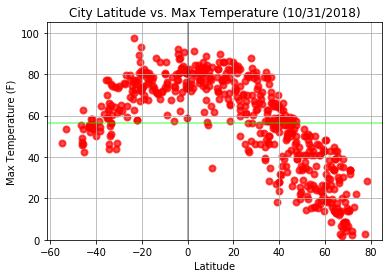

In [43]:
#Scatter plot of Latitude vs. Temperature Plot

x_axis = weatherDataDF['Lat']
y_axis = weatherDataDF['Max Temp']

plt.title('City Latitude vs. Max Temperature (%s)' % weatherDataDF['Date'][1])
plt.axvline(0, color = 'black', alpha = .40)
plt.axhline(mtempmean, color = 'lime', alpha = .50)
plt.ylim(0, 105)
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.scatter(x_axis, y_axis,alpha=0.7, c='red', edgecolors='red', linewidths=2 )
plt.grid()
plt.savefig("Graph_Output/CityLat_vs_MTemp.png")
plt.show()


#### Latitude vs. Humidity Plot

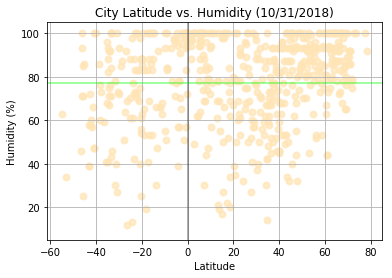

In [44]:
#Scatter plot of Latitude vs. Humidity Plot

x_axis = weatherDataDF['Lat']
y_axis = weatherDataDF['Humidity']

plt.title("City Latitude vs. Humidity (%s)" % weatherDataDF['Date'][1])
plt.axvline(0, color = 'black', alpha = .40 ) 
plt.axhline(humdidmean, color = 'lime', alpha = .50)
plt.ylim(5, 105)
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_axis,alpha=0.7, c='moccasin', edgecolors='moccasin', linewidths=2 )
plt.grid()
plt.savefig("Graph_Output/CityLat_vs_Humidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

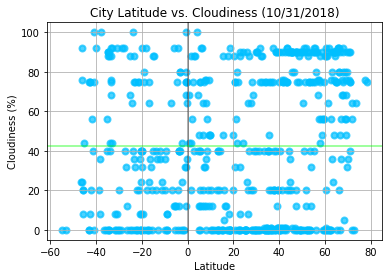

In [45]:
#Scatter plot of Latitude vs. Cloudiness Plot

x_axis = weatherDataDF['Lat']
y_axis = weatherDataDF['Cloudiness']

plt.title("City Latitude vs. Cloudiness (%s)" % weatherDataDF['Date'][1])
plt.axvline(0, color = 'black', alpha = .40) 
plt.axhline(cloudmean, color = 'lime', alpha = .50)
plt.ylim(-5, 105) 
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_axis,alpha=0.7, c='deepskyblue', edgecolors='deepskyblue', linewidths=2 )
plt.grid()
plt.savefig("Graph_Output/CityLat_vs_Cloudiness.png")
plt.show()


#### Latitude vs. Wind Speed Plot

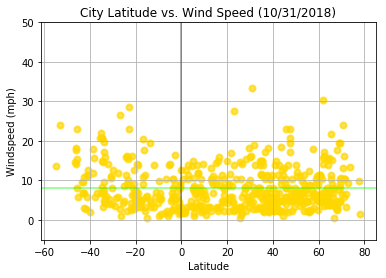

In [46]:
#Scatter plot of Latitude vs. Wind Speed Plot

x_axis = weatherDataDF['Lat']
y_axis = weatherDataDF['Wind Speed']

plt.title("City Latitude vs. Wind Speed (%s)" % weatherDataDF['Date'][1])
plt.axvline(0, color = 'black', alpha = .40)
plt.axhline(windspdmean, color = 'lime', alpha = .50)
plt.ylim(-5, 50) 
plt.xlabel('Latitude')
plt.ylabel("Windspeed (mph)")
plt.scatter(x_axis, y_axis,alpha=0.7, c='gold', edgecolors='gold', linewidths=2 )
plt.grid()
plt.savefig("Graph_Output/CityLat_vs_WindSpeed.png")
plt.show()
